<a href="https://colab.research.google.com/github/AhmedSheded/NeuralNetwork/blob/master/Imge_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

 94% 326M/346M [00:02<00:00, 119MB/s]
100% 346M/346M [00:02<00:00, 136MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os 
import cv2
import tensorflow as tf
import glob as gb

In [ ]:
! unzip 'intel-image-classification.zip'


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
! pwd
! ls

/content
intel-image-classification.zip	sample_data  seg_test
kaggle.json			seg_pred     seg_train


In [ ]:
trainpath = '/content/seg_train/'
testpath = '/content/seg_test/'
predpath = '/content/seg_pred/'

In [ ]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 2191 in folder buildings
For training data , found 2404 in folder glacier
For training data , found 2274 in folder sea
For training data , found 2271 in folder forest
For training data , found 2512 in folder mountain
For training data , found 2382 in folder street


In [ ]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 553 in folder glacier
For testing data , found 510 in folder sea
For testing data , found 474 in folder forest
For testing data , found 525 in folder mountain
For testing data , found 501 in folder street


In [ ]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [ ]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [ ]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [ ]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [ ]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [ ]:
s = 100

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


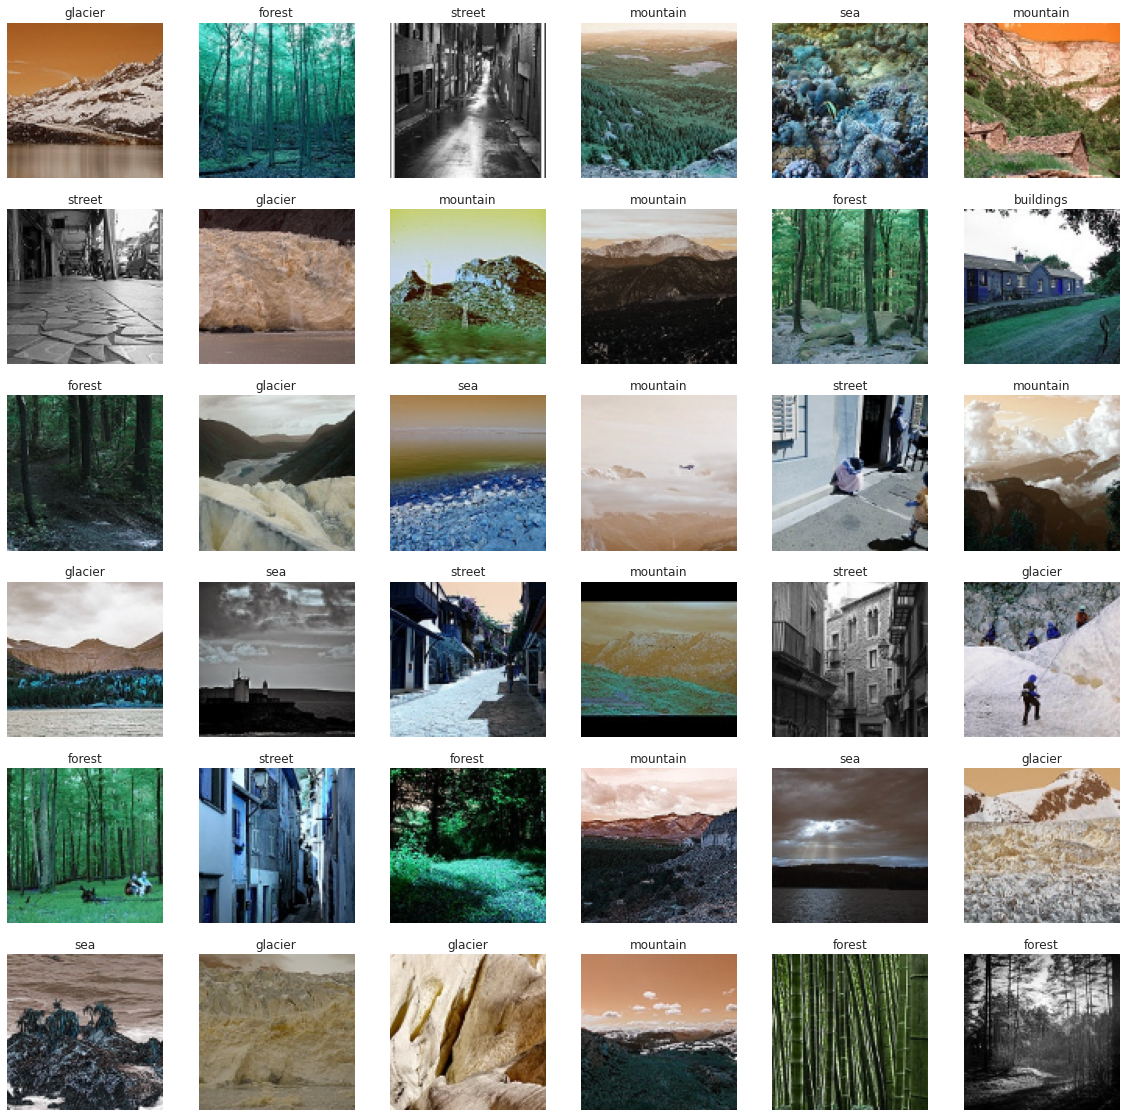

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


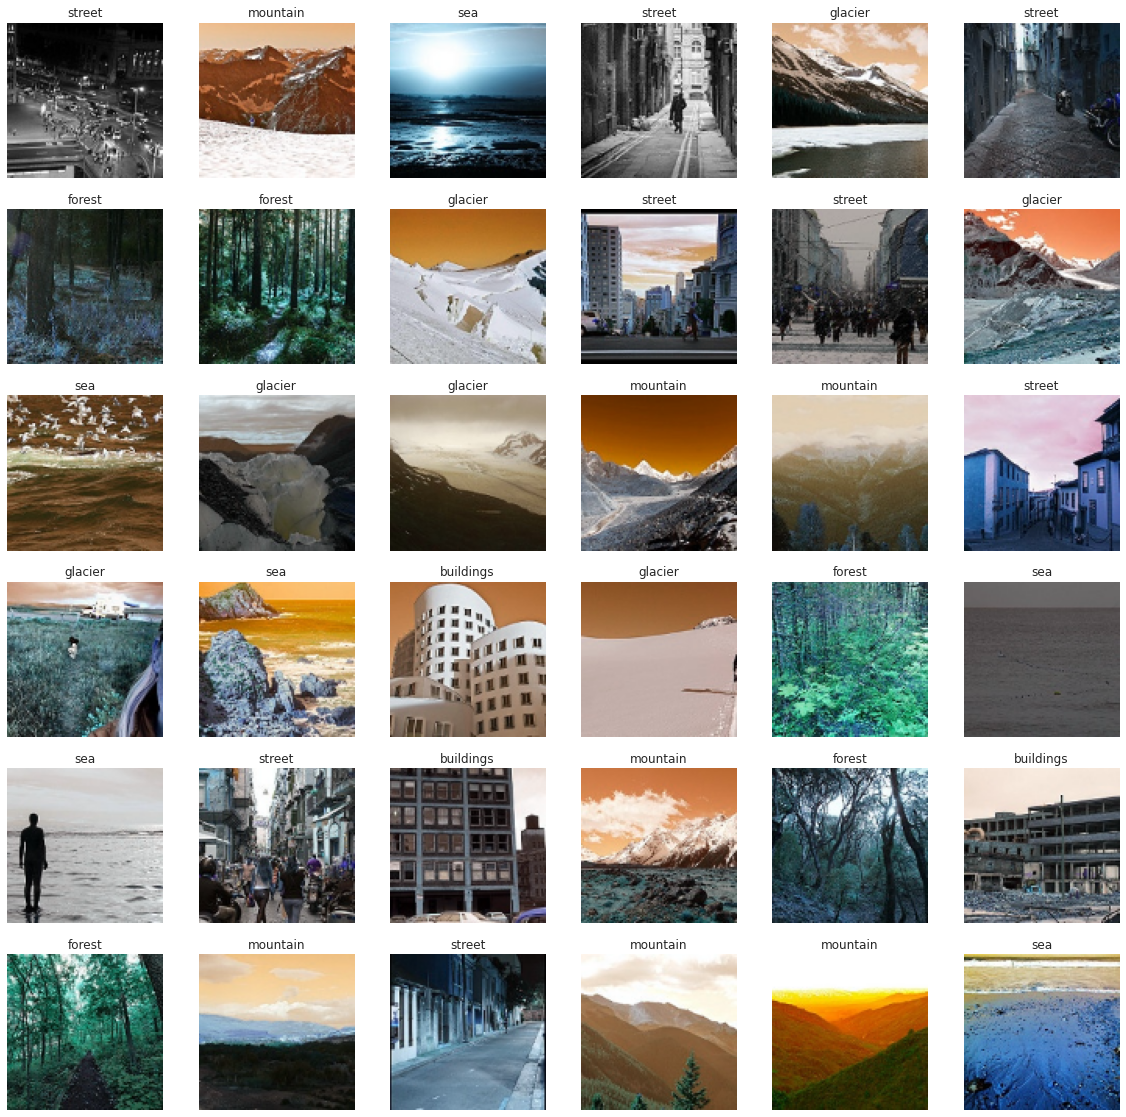

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [ ]:
model = tf.keras.Sequential([
         tf.keras.layers.Conv2D(200, kernel_size=(3, 3), activation='relu', input_shape=(s, s, 3)),
         tf.keras.layers.Conv2D(150, kernel_size=(3, 3), activation='relu'),
         tf.keras.layers.MaxPool2D(4, 4),
         tf.keras.layers.Conv2D(120, kernel_size=(3, 3), activation='relu'),   
         tf.keras.layers.Conv2D(80, kernel_size=(3, 3), activation='relu'),
         tf.keras.layers.Conv2D(50, kernel_size=(3, 3), activation='relu'),
         tf.keras.layers.MaxPool2D(4,4),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(512, activation='relu'),
         tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Dense(256, activation='relu'),
         tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dropout(rate=0.2),
         tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0

In [ ]:
epochs = 1
FirestModel = model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=1)

220/220 [==============================] - 4498s 20s/step - loss: 0.8281 - accuracy: 0.6981


In [ ]:
ModelLoss, ModelAccuracy = FirestModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')